# Today's practice: let's work on validation: pipeline, kfold,stratified or cross validation, GridSearchCV, RandomizedSearchCV, score matrices!

# 1. Kfold: stratified or cross validation

In [2]:
# load dataset using kagglehub
import kagglehub
path = kagglehub.dataset_download("suvidyasonawane/house-price-prediction-dataset")
import pandas as pd

In [3]:
import os
import pandas as pd

directory = r'C:\Users\justc\.cache\kagglehub\datasets\suvidyasonawane\house-price-prediction-dataset\versions\1'
filn ='house_prices_practice.csv'
flp = os.path.join(directory, filn)
df = pd.read_csv(flp)
df.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice
0,1,7,1560,0,1658,1969,2,1,8059,177106
1,2,4,2827,2,1319,2012,3,4,13530,301044
2,3,8,3920,0,841,2010,1,4,9010,360609
3,4,5,3044,0,1058,1998,0,4,13207,240556
4,5,7,801,1,2428,2020,0,1,9117,193656


In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

#dataset into training/test and make pipeline
X, y = df.iloc[:, :9], df.iloc[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
pipe_lr = make_pipeline(StandardScaler(), Ridge())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
test_acc

0.9762098550651034

# A Heatmap of Corr.

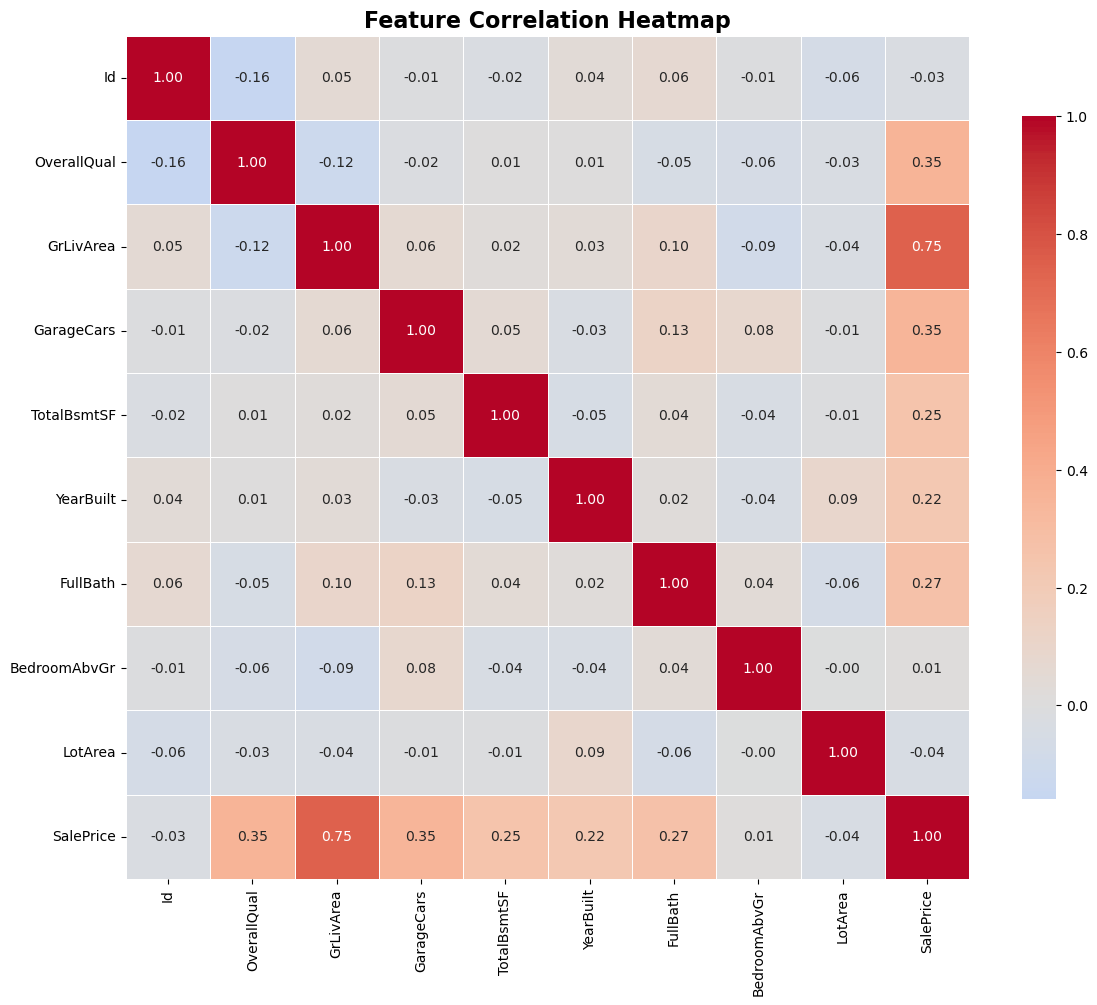

In [ ]:
#heatmap of correlation: 
import seaborn as sns
import matplotlib.pyplot as plt 
# Compute correlation matrix for all features including target
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
#we can see that GrLivArea has most effect on house price!

In [12]:
#kfold CV
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=1).split(X_train, y_train) #manipulate n
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train.iloc[train], y_train.iloc[train])
    score = pipe_lr.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    print(f'fold: {k+1:02d},'
          f'Class distr.: {np.bincount(y_train.iloc[train])},'
          f'Acc.: {score:.3f}')
    
print(np.mean(scores))

fold: 01,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.974
fold: 02,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.960
fold: 03,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.985
fold: 04,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.981
fold: 05,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.955
fold: 06,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.976
fold: 07,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.968
fold: 08,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.970
fold: 09,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.974
fold: 10,Class distr.: [0 0 0 ... 0 0 1],Acc.: 0.982
0.9724738581339258


# Simpler: use cross_val_score for crossvalidation

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=2)
scores

array([0.97641084, 0.9785024 , 0.97146475, 0.97097677, 0.97080814,
       0.98698108, 0.96655572, 0.96581496, 0.96725412, 0.97255467])

# Hyperparameter tuning for LG? next time.
# the following is learning curve

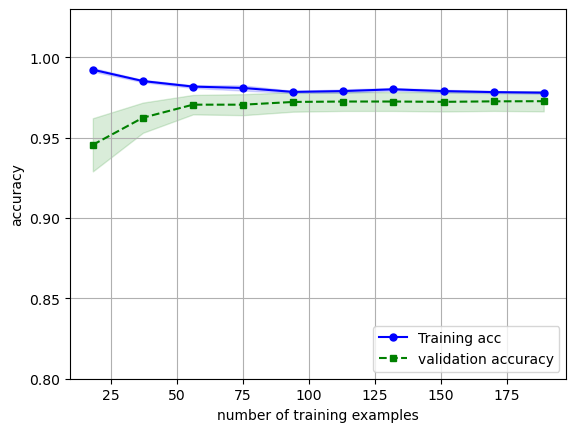

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training acc')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('number of training examples')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.03])
plt.show()



# GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe_lr = make_pipeline(StandardScaler(), Ridge())

grid = GridSearchCV(
    estimator=pipe_lr, 
    param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}, 
    cv=10, 
    scoring='neg_mean_squared_error'  # or 'r2' for regression
)

grid.fit(X_train, y_train)

print(f"Best alpha: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_}")

Best alpha: {'ridge__alpha': 0.1}
Best CV score: -141053125.46373868


: 